# Machine Learning Car Price Assignment

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
carprice_auto = pd.read_csv(r"C:/Users/Neemesh/Desktop/CarPrice_Assignment.csv")

In [3]:
carprice_auto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
carprice_auto.shape

(205, 26)

In [5]:
carprice_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
carprice_auto.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data cleaning

In [7]:
#Checking for the Duplicate value in dataset
sum(carprice_auto.duplicated(subset = 'car_ID')) == 0

True

In [8]:
# Checking for the Null and NaN values in the data set
round(100*(carprice_auto.isnull().sum()/len(carprice_auto.index)), 2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

##### (iii) Splitting Carname data to remove the Model Name

Variable  CarName is comprised of two parts - the first part is the name of 'car company' and 
the second is the 'car model'.

We need to consider only company name as the independent variable for building model.

In [9]:
# Splitting the CarName
carprice_auto['CarName'] = carprice_auto['CarName'].str.strip()
carprice_auto[['CompanyName', 'Model']] = carprice_auto['CarName'].str.split(' ', n=1, expand=True)
carprice_auto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [10]:
# Droping the CarName, car_ID and Model
carprice_auto.drop(['CarName', 'car_ID', 'Model'],axis=1,inplace=True)
carprice_auto.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [11]:
carprice_auto['CompanyName'] = carprice_auto['CompanyName'].str.replace('vw','volkswagen') 
carprice_auto['CompanyName'] = carprice_auto['CompanyName'].str.replace('vokswagen','volkswagen') 
carprice_auto['CompanyName'] = carprice_auto['CompanyName'].str.replace('toyouta','toyota') 
carprice_auto['CompanyName'] = carprice_auto['CompanyName'].str.replace('porcshce','porsche') 
carprice_auto['CompanyName'] = carprice_auto['CompanyName'].str.replace('maxda','mazda')
carprice_auto['CompanyName'] = carprice_auto['CompanyName'].str.replace('alfa-romero','alfa romeo')
carprice_auto["fuelsystem"]= carprice_auto["fuelsystem"].str.replace('mfi', 'mpfi')
carprice_auto["fuelsystem"]= carprice_auto["fuelsystem"].str.replace('spdi', 'spfi')
carprice_auto["enginetype"]= carprice_auto["enginetype"].str.replace('dohcv', 'dohc')
carprice_auto.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa romeo
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa romeo
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa romeo
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


#### Dealing with Categorical variables

In [12]:
# Creating the dummies for categorical variables
carprice_auto = pd.get_dummies(carprice_auto, columns =['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype', 'cylindernumber','fuelsystem','CompanyName'], drop_first = True)
carprice_auto.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


### Numeric variables

In [13]:
# Normalizing the variables
norm_cols = ['symboling', 'wheelbase','carlength','carwidth' ,'carheight','curbweight','enginesize', 'boreratio', 'stroke','compressionratio','horsepower',
             'peakrpm','citympg', 'highwaympg','price']
carprice_auto_norm = carprice_auto[norm_cols].apply(lambda x: (x-np.mean(x))/ (max(x) - min(x)))
carprice_auto_norm.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.433171,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,0.028679,-0.051070,-0.117209,-0.098716,0.005419
1,0.433171,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,0.028679,-0.051070,-0.117209,-0.098716,0.080018
2,0.033171,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,0.094689,-0.464111,0.102184,-0.071409,0.207846,-0.051070,-0.172764,-0.125032,0.080018
3,0.233171,0.030420,0.038071,0.024350,0.047927,-0.084781,-0.067575,-0.099826,0.068850,-0.008909,-0.008821,0.153011,-0.033875,-0.019769,0.016714
4,0.233171,0.018758,0.038071,0.041016,0.047927,0.104125,0.034312,-0.099826,0.068850,-0.133909,0.045346,0.153011,-0.200542,-0.230295,0.103602


In [14]:
# Substituing the normalized values in the data set carprice
carprice_auto['symboling'] = carprice_auto_norm['symboling']
carprice_auto['wheelbase'] = carprice_auto_norm['wheelbase']
carprice_auto['carlength'] = carprice_auto_norm['carlength']
carprice_auto['carwidth'] = carprice_auto_norm['carwidth']
carprice_auto['carheight'] = carprice_auto_norm['carheight']
carprice_auto['curbweight'] = carprice_auto_norm['curbweight']
carprice_auto['enginesize'] = carprice_auto_norm['enginesize']
carprice_auto['boreratio'] = carprice_auto_norm['boreratio']
carprice_auto['stroke'] = carprice_auto_norm['stroke']
carprice_auto['compressionratio'] = carprice_auto_norm['compressionratio']
carprice_auto['horsepower'] = carprice_auto_norm['horsepower']
carprice_auto['peakrpm']= carprice_auto_norm['peakrpm']
carprice_auto['citympg'] = carprice_auto_norm['citympg']
carprice_auto['highwaympg'] = carprice_auto_norm['highwaympg']
carprice_auto['price'] = carprice_auto_norm['price']
carprice_auto.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,0.433171,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,...,0,0,0,0,0,0,0,0,0,0
1,0.433171,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,...,0,0,0,0,0,0,0,0,0,0
2,0.033171,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,0.094689,-0.464111,0.102184,-0.071409,...,0,0,0,0,0,0,0,0,0,0
3,0.233171,0.030420,0.038071,0.024350,0.047927,-0.084781,-0.067575,-0.099826,0.068850,-0.008909,...,0,0,0,0,0,0,0,0,0,0
4,0.233171,0.018758,0.038071,0.041016,0.047927,0.104125,0.034312,-0.099826,0.068850,-0.133909,...,0,0,0,0,0,0,0,0,0,0


##  Splitting the data Set in training set and Test Set

In [15]:
import sklearn
from sklearn.model_selection import train_test_split
carprice_auto_train,carprice_auto_test = train_test_split(carprice_auto, train_size = 0.7, random_state = 100)
print(carprice_auto_train.shape)
print(carprice_auto_test.shape)
carprice_auto_train.info()

(143, 63)
(62, 63)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 63 columns):
symboling                 143 non-null float64
wheelbase                 143 non-null float64
carlength                 143 non-null float64
carwidth                  143 non-null float64
carheight                 143 non-null float64
curbweight                143 non-null float64
enginesize                143 non-null float64
boreratio                 143 non-null float64
stroke                    143 non-null float64
compressionratio          143 non-null float64
horsepower                143 non-null float64
peakrpm                   143 non-null float64
citympg                   143 non-null float64
highwaympg                143 non-null float64
price                     143 non-null float64
fueltype_gas              143 non-null uint8
aspiration_turbo          143 non-null uint8
doornumber_two            143 non-null uint8
carbody_hardtop           143 non-nu

## Model Building

#### use of RFE to reduce the variables

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
y_train = carprice_auto_train.pop('price')
x_train = carprice_auto_train

In [17]:
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm,25)
rfe = rfe.fit(x_train,y_train)

In [18]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 34),
 ('wheelbase', True, 1),
 ('carlength', False, 5),
 ('carwidth', True, 1),
 ('carheight', False, 2),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 10),
 ('horsepower', False, 32),
 ('peakrpm', True, 1),
 ('citympg', False, 18),
 ('highwaympg', True, 1),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', True, 1),
 ('doornumber_two', False, 26),
 ('carbody_hardtop', False, 12),
 ('carbody_hatchback', False, 11),
 ('carbody_sedan', False, 13),
 ('carbody_wagon', False, 14),
 ('drivewheel_fwd', False, 37),
 ('drivewheel_rwd', False, 22),
 ('enginelocation_rear', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 23),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 20),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 36),
 ('cylindernumber_three', True, 1),
 ('cylindernumber

In [19]:
col = x_train.columns[rfe.support_]
col

Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'peakrpm', 'highwaympg', 'aspiration_turbo',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'CompanyName_bmw', 'CompanyName_mitsubishi', 'CompanyName_peugeot',
       'CompanyName_porsche', 'CompanyName_saab', 'CompanyName_subaru',
       'CompanyName_volvo'],
      dtype='object')

In [20]:
col_drop = x_train.columns[~rfe.support_]
col_drop

Index(['symboling', 'carlength', 'carheight', 'compressionratio', 'horsepower',
       'citympg', 'fueltype_gas', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_ohc', 'enginetype_ohcv',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spfi',
       'CompanyName_alfa romeo', 'CompanyName_audi', 'CompanyName_buick',
       'CompanyName_chevrolet', 'CompanyName_dodge', 'CompanyName_honda',
       'CompanyName_isuzu', 'CompanyName_jaguar', 'CompanyName_mazda',
       'CompanyName_mercury', 'CompanyName_nissan', 'CompanyName_plymouth',
       'CompanyName_renault', 'CompanyName_toyota', 'CompanyName_volkswagen'],
      dtype='object')

#### Creating the model using the library Statsmodel

In [21]:
#creating x_train dataframe with RFE selected variables
x_train_rfe = x_train[col]

#Adding  constant variable to the model
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     125.6
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           3.83e-72
Time:                        22:13:00   Log-Likelihood:                 259.53
No. Observations:                 143   AIC:                            -473.1
Df Residuals:                     120   BIC:                            -404.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

#### Calculating the VIF

In [22]:
#Creating a new dataframe which will contain the name of all the feature variables and their respective VIF

vif = pd.DataFrame()
X = x_train_rfe
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,enginetype_rotor,inf
10,enginelocation_rear,inf
24,CompanyName_subaru,inf
21,CompanyName_peugeot,inf
18,cylindernumber_two,inf
16,cylindernumber_three,inf
12,enginetype_ohcf,inf
11,enginetype_l,inf
0,const,67.620000
4,enginesize,39.020000


In [23]:
# Sicne the Wheelbase is having the graeter than 5 VIF so we are dropping that variable
x_train_1 = x_train_rfe.drop(["wheelbase"], axis = 1)

In [24]:
# Creting the First Model

x_train_lm = sm.add_constant(x_train_1)
lm = sm.OLS(y_train,x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     131.8
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           4.64e-73
Time:                        22:13:00   Log-Likelihood:                 259.12
No. Observations:                 143   AIC:                            -474.2
Df Residuals:                     121   BIC:                            -409.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [25]:
vif = pd.DataFrame()
X = x_train_1
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,enginetype_rotor,inf
9,enginelocation_rear,inf
23,CompanyName_subaru,inf
20,CompanyName_peugeot,inf
17,cylindernumber_two,inf
15,cylindernumber_three,inf
11,enginetype_ohcf,inf
10,enginetype_l,inf
0,const,67.480000
3,enginesize,38.430000


In [26]:
# Dropping the variable highwaympg
x_train_2 = x_train_1.drop(["highwaympg"], axis = 1)

In [27]:
#Creating the second model

x_train_m11 = sm.add_constant(x_train_2)
lm = sm.OLS(y_train,x_train_m11).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.82e-73
Time:                        22:13:01   Log-Likelihood:                 257.29
No. Observations:                 143   AIC:                            -472.6
Df Residuals:                     122   BIC:                            -410.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [28]:
vif = pd.DataFrame()
X = x_train_2
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
14,cylindernumber_three,inf
22,CompanyName_subaru,inf
19,CompanyName_peugeot,inf
16,cylindernumber_two,inf
8,enginelocation_rear,inf
9,enginetype_l,inf
10,enginetype_ohcf,inf
11,enginetype_rotor,inf
0,const,66.720000
3,enginesize,38.350000


#As the VIF for CompanyName_subaru, CompanyName_peugeot, cylindernumber_three, cylindernumber_two, enginelocation_rear,  
enginetype_l, enginetype_ohcf, enginetype_rotor is infinity so we check for the correlation coeffcient value for the same.

In [29]:
x_train_m11['enginetype_ohcf'].corr(x_train_m11['CompanyName_subaru'])

0.953793595188298

In [30]:
x_train_m11['enginetype_l'].corr(x_train_m11['CompanyName_peugeot'])

0.9393106657272522

In [31]:
x_train_m11['cylindernumber_three'].corr(x_train_m11['enginelocation_rear'])

-0.007042253521126802

In [32]:
x_train_m11['cylindernumber_two'].corr(x_train_m11['enginetype_rotor'])

0.9999999999999998

#Since the correlation of enginetype_ohcf and CompanyName_subaru,engintyep_1 and CompanyName_peugeot,cylindernumber_two and enginetype_rotor is very high so we will drop the variables CompanyName_subaru, CompanyName_peugeot, enginetype_rotor.

In [33]:
x_train_3 = x_train_2.drop(["CompanyName_subaru","CompanyName_peugeot","enginetype_rotor"], axis = 1)

In [34]:
# Creating the third model

x_train_m12 = sm.add_constant(x_train_3)
lm = sm.OLS(y_train,x_train_m12).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.82e-73
Time:                        22:13:02   Log-Likelihood:                 257.29
No. Observations:                 143   AIC:                            -472.6
Df Residuals:                     122   BIC:                            -410.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [35]:
vif = pd.DataFrame()
X = x_train_3
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,66.72
3,enginesize,38.35
12,cylindernumber_four,16.04
2,curbweight,14.22
4,boreratio,10.13
15,cylindernumber_two,7.40
1,carwidth,6.57
10,enginetype_ohcf,3.81
11,cylindernumber_five,3.71
14,cylindernumber_twelve,3.36


In [36]:
# Droping the variable enginetype_ohcf becasue its P values is graeter than 0.05.
x_train_4 = x_train_3.drop(["enginetype_ohcf"], axis = 1)

In [37]:
# Creating the fourth model

x_train_m13 = sm.add_constant(x_train_4)
lm = sm.OLS(y_train,x_train_m13).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           3.55e-74
Time:                        22:13:02   Log-Likelihood:                 256.27
No. Observations:                 143   AIC:                            -472.5
Df Residuals:                     123   BIC:                            -413.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [38]:
vif = pd.DataFrame()
X = x_train_4
vif['Features']= X.columns

vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,52.20
3,enginesize,34.07
2,curbweight,14.10
11,cylindernumber_four,13.93
1,carwidth,6.44
4,boreratio,6.26
14,cylindernumber_two,6.26
10,cylindernumber_five,3.33
13,cylindernumber_twelve,3.26
5,stroke,2.62


In [39]:
# Droping the variable peakrpm

x_train_5 = x_train_4.drop(["peakrpm"], axis = 1)

In [40]:
# Creating the fifth model
x_train_m14 = sm.add_constant(x_train_5)
lm = sm.OLS(y_train,x_train_m14).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     147.0
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.47e-74
Time:                        22:13:03   Log-Likelihood:                 254.36
No. Observations:                 143   AIC:                            -470.7
Df Residuals:                     124   BIC:                            -414.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [41]:
vif = pd.DataFrame()
X = x_train_5
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,52.20
3,enginesize,34.05
2,curbweight,14.06
10,cylindernumber_four,13.91
1,carwidth,6.43
13,cylindernumber_two,6.15
4,boreratio,6.09
9,cylindernumber_five,3.33
12,cylindernumber_twelve,3.26
5,stroke,2.62


In [42]:
# Droppnig the variable curbweight

x_train_6 = x_train_5.drop(["curbweight"], axis = 1)

In [43]:
# Craeting the Sixth model
x_train_m15 = sm.add_constant(x_train_6)
lm = sm.OLS(y_train,x_train_m15).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     148.1
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           3.58e-74
Time:                        22:13:03   Log-Likelihood:                 250.41
No. Observations:                 143   AIC:                            -464.8
Df Residuals:                     125   BIC:                            -411.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [44]:
vif = pd.DataFrame()
X = x_train_6
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,51.66
2,enginesize,23.97
9,cylindernumber_four,13.88
3,boreratio,6.09
1,carwidth,5.94
12,cylindernumber_two,5.71
8,cylindernumber_five,3.23
11,cylindernumber_twelve,2.91
4,stroke,2.54
10,cylindernumber_three,2.21


In [45]:
# Droping the variable boreratio

x_train_7 = x_train_6.drop(["boreratio"], axis = 1)

In [46]:
#Creating the Seventh model
x_train_m16 = sm.add_constant(x_train_7)
lm = sm.OLS(y_train,x_train_m16).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     96.01
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.84e-62
Time:                        22:13:03   Log-Likelihood:                 216.68
No. Observations:                 143   AIC:                            -399.4
Df Residuals:                     126   BIC:                            -349.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [47]:
vif = pd.DataFrame()
X = x_train_7
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,20.16
2,enginesize,9.11
1,carwidth,5.93
8,cylindernumber_four,5.69
11,cylindernumber_two,2.56
7,cylindernumber_five,2.48
9,cylindernumber_three,1.85
6,enginetype_l,1.84
5,enginelocation_rear,1.81
14,CompanyName_porsche,1.81


In [48]:
# Dropping the variable CompanyName_volvo

x_train_8 = x_train_7.drop(["CompanyName_volvo"], axis = 1)

In [49]:
#Creating the eighth model

x_train_m17 = sm.add_constant(x_train_8)
lm = sm.OLS(y_train,x_train_m17).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           3.68e-63
Time:                        22:13:04   Log-Likelihood:                 215.85
No. Observations:                 143   AIC:                            -399.7
Df Residuals:                     127   BIC:                            -352.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [50]:
vif = pd.DataFrame()
X = x_train_8
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,20.00
2,enginesize,9.01
8,cylindernumber_four,5.68
1,carwidth,5.29
11,cylindernumber_two,2.55
7,cylindernumber_five,2.33
9,cylindernumber_three,1.80
5,enginelocation_rear,1.79
14,CompanyName_porsche,1.75
10,cylindernumber_twelve,1.71


In [51]:
# Droping the variable CompanyName_saab

x_train_9 = x_train_8.drop(["CompanyName_saab"], axis = 1)

In [52]:
# Creating the ninth model

x_train_m18 = sm.add_constant(x_train_9)
lm = sm.OLS(y_train,x_train_m18).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     108.4
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           8.28e-64
Time:                        22:13:04   Log-Likelihood:                 214.86
No. Observations:                 143   AIC:                            -399.7
Df Residuals:                     128   BIC:                            -355.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [53]:
vif = pd.DataFrame()
X = x_train_9
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,19.91
2,enginesize,9.01
8,cylindernumber_four,5.60
1,carwidth,5.20
11,cylindernumber_two,2.54
7,cylindernumber_five,2.32
5,enginelocation_rear,1.78
9,cylindernumber_three,1.77
14,CompanyName_porsche,1.74
10,cylindernumber_twelve,1.71


In [54]:
# Dropping the variable cylindernumber_four

x_train_10 = x_train_9.drop(["cylindernumber_four"], axis = 1)

In [55]:
# Creating the tenth model

x_train_m19 = sm.add_constant(x_train_10)
lm = sm.OLS(y_train,x_train_m19).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     116.0
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.77e-64
Time:                        22:13:05   Log-Likelihood:                 213.90
No. Observations:                 143   AIC:                            -399.8
Df Residuals:                     129   BIC:                            -358.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [56]:
vif = pd.DataFrame()
X = x_train_10
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,carwidth,5.16
2,enginesize,5.09
5,enginelocation_rear,1.77
13,CompanyName_porsche,1.74
0,const,1.72
6,enginetype_l,1.53
7,cylindernumber_five,1.52
9,cylindernumber_twelve,1.52
4,aspiration_turbo,1.40
3,stroke,1.32


In [57]:
# Droping the variable cylindernumber_five

x_train_11 = x_train_10.drop(["cylindernumber_five"], axis = 1)

In [58]:
#Creating the eleventh model

x_train_m20 = sm.add_constant(x_train_11)
lm = sm.OLS(y_train,x_train_m20).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     124.4
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           4.42e-65
Time:                        22:13:05   Log-Likelihood:                 212.73
No. Observations:                 143   AIC:                            -399.5
Df Residuals:                     130   BIC:                            -360.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [59]:
vif = pd.DataFrame()
X = x_train_11
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,enginesize,4.63
1,carwidth,4.01
5,enginelocation_rear,1.71
12,CompanyName_porsche,1.68
0,const,1.55
8,cylindernumber_twelve,1.51
4,aspiration_turbo,1.38
6,enginetype_l,1.37
3,stroke,1.30
7,cylindernumber_three,1.26


In [60]:
# Dropping the variable CompanyName_porsche
x_train_12 = x_train_11.drop(["CompanyName_porsche"], axis = 1)

### Building Twelweth model

In [61]:
# Creating the twelfth mdoel
x_train_m21 = sm.add_constant(x_train_12)
lm = sm.OLS(y_train,x_train_m21).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     133.4
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.63e-65
Time:                        22:13:05   Log-Likelihood:                 211.10
No. Observations:                 143   AIC:                            -398.2
Df Residuals:                     131   BIC:                            -362.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [62]:
vif = pd.DataFrame()
X = x_train_12
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,enginesize,4.63
1,carwidth,3.79
8,cylindernumber_twelve,1.50
0,const,1.49
4,aspiration_turbo,1.36
6,enginetype_l,1.35
3,stroke,1.28
7,cylindernumber_three,1.25
9,cylindernumber_two,1.21
10,CompanyName_bmw,1.16


In [63]:
#Droping the variable cylindernumber_twelve
x_train_13 = x_train_12.drop(["cylindernumber_twelve"], axis = 1)

In [64]:
# Creating the thirteenth model

x_train_m22 = sm.add_constant(x_train_13)
lm = sm.OLS(y_train,x_train_m22).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     143.2
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           8.86e-66
Time:                        22:13:06   Log-Likelihood:                 209.01
No. Observations:                 143   AIC:                            -396.0
Df Residuals:                     132   BIC:                            -363.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [65]:
# Droping the variable stroke
x_train_14 = x_train_13.drop(["stroke"], axis = 1)

In [66]:
# Creating the fourteenth model

x_train_m23 = sm.add_constant(x_train_14)
lm = sm.OLS(y_train,x_train_m23).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     157.4
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           2.06e-66
Time:                        22:13:06   Log-Likelihood:                 207.81
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     133   BIC:                            -366.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [67]:
vif = pd.DataFrame()
X = x_train_14
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,carwidth,3.49
2,enginesize,3.29
0,const,1.46
3,aspiration_turbo,1.34
5,enginetype_l,1.34
6,cylindernumber_three,1.25
7,cylindernumber_two,1.16
9,CompanyName_mitsubishi,1.12
8,CompanyName_bmw,1.10
4,enginelocation_rear,1.09


### Residual Analysis 

In [68]:
y_train_price = lm.predict(x_train_m23)

Text(0.5, 0, 'Errors')

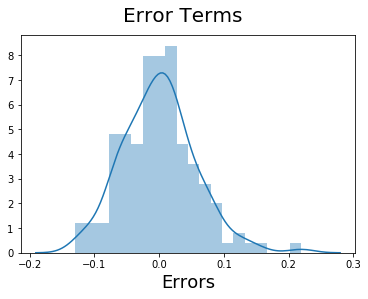

In [69]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

In [70]:
# The distribution of residual follows the normal distribution which means our model is so far good.

### Prediction

In [71]:
y_test = carprice_auto_test.pop('price')
x_test = carprice_auto_test
x_test_m23 = x_test.drop(['wheelbase','highwaympg','CompanyName_subaru','CompanyName_peugeot',
                              'enginetype_rotor','enginetype_ohcf','peakrpm','curbweight','boreratio',
                              'CompanyName_volvo','CompanyName_saab','cylindernumber_four','cylindernumber_five',
                              'CompanyName_porsche','cylindernumber_twelve','stroke','symboling','carlength','carheight','compressionratio','horsepower','citympg','fueltype_gas','doornumber_two',
'carbody_hardtop','carbody_hatchback','carbody_sedan','carbody_wagon','drivewheel_fwd','drivewheel_rwd','enginetype_ohc',
'enginetype_ohcv','cylindernumber_six','fuelsystem_2bbl','fuelsystem_4bbl','fuelsystem_idi','fuelsystem_mpfi','fuelsystem_spfi',
'CompanyName_alfa romeo','CompanyName_audi','CompanyName_buick','CompanyName_chevrolet','CompanyName_dodge','CompanyName_honda',
'CompanyName_isuzu','CompanyName_jaguar','CompanyName_mazda','CompanyName_mercury','CompanyName_nissan','CompanyName_plymouth',
'CompanyName_renault','CompanyName_toyota','CompanyName_volkswagen'],axis=1)
x_test_m23 = sm.add_constant(x_test_m23)
#x_test_m13 = x_test_m13.drop(coldrop, axis=1)

x_test_m23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 10 columns):
const                     62 non-null float64
carwidth                  62 non-null float64
enginesize                62 non-null float64
aspiration_turbo          62 non-null uint8
enginelocation_rear       62 non-null uint8
enginetype_l              62 non-null uint8
cylindernumber_three      62 non-null uint8
cylindernumber_two        62 non-null uint8
CompanyName_bmw           62 non-null uint8
CompanyName_mitsubishi    62 non-null uint8
dtypes: float64(3), uint8(7)
memory usage: 2.4 KB


In [72]:
# Predict price on test dataset

y_pred_m23 = lm.predict(x_test_m23)
y_pred_m23

160   -0.140918
186   -0.076107
59    -0.009773
165   -0.154599
140   -0.136721
64    -0.009773
198    0.092617
75     0.144696
172    0.018769
104    0.183944
200    0.119273
136    0.046430
111   -0.023964
41    -0.083896
73     0.627824
31    -0.172850
156   -0.140918
133   -0.012245
65     0.021038
83     0.053331
195    0.061131
197    0.061131
126    0.515150
118   -0.181213
167    0.018769
101    0.136062
124    0.126103
69     0.329645
11     0.120801
46    -0.061650
         ...   
110    0.113809
201    0.174528
115   -0.023964
174    0.019241
134   -0.012245
169    0.018769
92    -0.163911
173   -0.009773
74     0.628197
3     -0.052167
157   -0.140918
81    -0.120166
32    -0.201563
99    -0.059178
26    -0.181213
88    -0.149827
184   -0.105769
187   -0.047094
52    -0.165061
168    0.018769
164   -0.154599
188   -0.076107
7      0.192417
158   -0.111257
123   -0.074755
28    -0.074755
29     0.126103
182   -0.105769
40    -0.176239
128    0.515150
Length: 62, dtype: float

#### Evalaution of Model

Text(0, 0.5, 'Car Price')

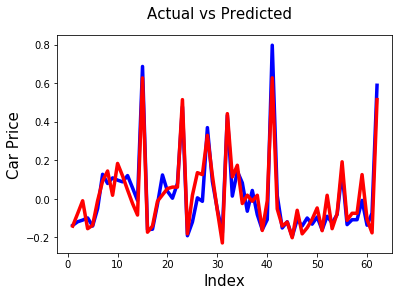

In [73]:
# Actual vs Predicted
g = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(g,y_test, color="blue", linewidth=3.5, linestyle="-")     
plt.plot(g,y_pred_m23, color="red",  linewidth=3.5, linestyle="-")  
fig.suptitle('Actual vs Predicted', fontsize=15)             
plt.xlabel('Index', fontsize=15)                               
plt.ylabel('Car Price', fontsize=15)

Text(0, 0.5, 'y_pred')

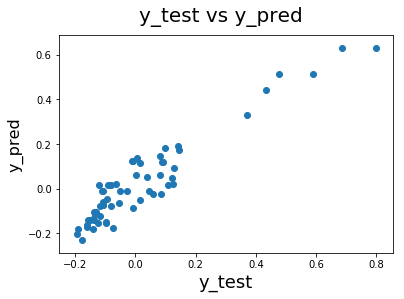

In [74]:
# Plotting the scatter plot for y_test and y_pred

fig = plt.figure()
plt.scatter(y_test,y_pred_m23)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [75]:
# Finding the RMSE because the its value indicates that how close your predicted values are to the fit of model.

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_m23)
print('Mean_Squared_Error :' ,mse)

Mean_Squared_Error : 0.004609178040575722


In [76]:
r_squared = r2_score(y_test, y_pred_m23)
print('r_square_value :',r_squared)

r_square_value : 0.8932010429826142
